nCycles - number of simuation cyces
nBuyers  - number of the buyers

nSellers - number of the sellers

initial buyer $i$ reservation price, different for each buyer: $p_{b,i}=\frac{1} {1 + u_i}$ with $u_i\sim\mathcal{U}(0,0.1)$

initial seller j reservation price, different for each seller: $p_{b,j}=1 + u_j$ with $u_j\sim\mathcal{U}(0,0.1)$

In [1]:
%pylab inline
import statistics as s
import numpy as np
import pylab as plt
from IPython.display import clear_output
#from IPython import display
from ipykernel.pylab.backend_inline import flush_figures
import time

Populating the interactive namespace from numpy and matplotlib


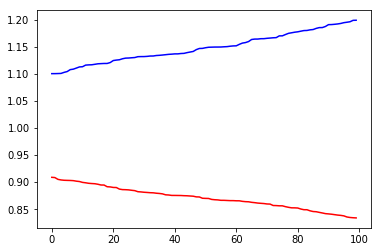

In [7]:
# warming up

# run it before executing both - the hayekian perspective or
#                              - the unstructured case

d0=0.1
d1=0.2
d2=0.2

nCycles=10000
nBuyers= 100
nSellers=100

buyerPriceList=[]
sellerPriceList=[]

for i in range(nBuyers):
    buyerPriceList.append(1/(1+np.random.uniform(d0,d1)))
for j in range(nSellers):
    sellerPriceList.append(1+np.random.uniform(d0,d2))
    
plt.plot(np.sort(buyerPriceList)[::-1],"r");
plt.plot(np.sort(sellerPriceList),"b");

time 10000 n. of exchanges 51
mean and var of exchange prices in the last cycle: 1.115, 0.238


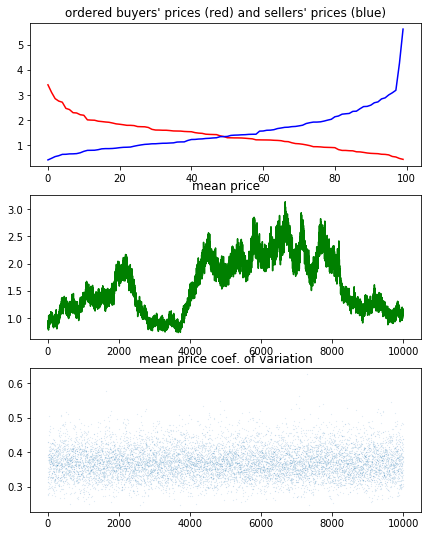

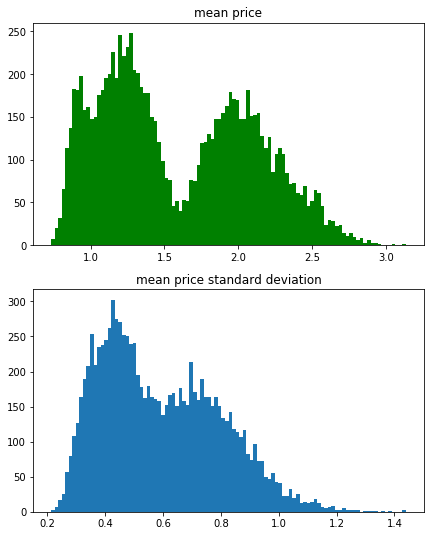

In [3]:
# hayekian perspective
d1=0.2
d2=0.2
meanPrice_ts=[]
meanPriceStDev_ts=[]
meanPriceVar_ts=[]

for t in range(1,nCycles+1):    
    dealPrices=[]
    agNum=max(nBuyers,nSellers)
    for n in range(agNum):
        i = np.random.randint(0,nBuyers)
        j = np.random.randint(0,nSellers)
        #print ('%2d %2d %.3f %.3f %.3f'% \
        #      (i,j,buyerPriceList[i]-sellerPriceList[j],\
        #       buyerPriceList[i],sellerPriceList[j]))
        
        if buyerPriceList[i]>=sellerPriceList[j]:
            dealPrices.append(sellerPriceList[j])
            buyerPriceList[i] *=1/(1+np.random.uniform(d1))
            sellerPriceList[j]*=1+np.random.uniform(d2)
        else:
            buyerPriceList[i] *=1+np.random.uniform(d1)
            sellerPriceList[j]*=1/(1+np.random.uniform(d2))

        #print ('%2d %2d %.3f %.3f %.3f \n'% \
        #      (i,j,buyerPriceList[i]-sellerPriceList[j],\
        #       buyerPriceList[i],sellerPriceList[j]))
           
    if len(dealPrices) > 2:
        meanPrice_ts.append(s.mean(dealPrices))
        meanPriceVar_ts.append(s.variance(dealPrices))
        meanPriceStDev_ts.append(s.stdev(dealPrices))
    else:
        meanPrice_ts.append(np.nan)
        meanPriceStDev_ts.append(np.nan)

    if t % 1000==0:
        clear_output()
        #flush_figures()
        print('time', t, 'n. of exchanges', len(dealPrices))
        print(\
        'mean and var of exchange prices in the last cycle: %.3f, %.3f' %\
              (meanPrice_ts[-1],meanPriceVar_ts[-1]))

        plt.figure(1,figsize=(7,9),clear=True)
        plt.subplot(311)
        plt.title(\
            "ordered buyers' prices (red) and sellers' prices (blue)")
        plt.plot(np.sort(buyerPriceList)[::-1],"r")
        plt.plot(np.sort(sellerPriceList),"b")
        plt.subplot(312)
        plt.title("mean price")
        plt.plot(meanPrice_ts,"g")
        plt.subplot(313)
        plt.title("mean price coef. of variation")
        coefOfVariation=[]
        for m in range(len(meanPriceStDev_ts)):
            coefOfVariation.append(meanPriceStDev_ts[m]/
                                   meanPrice_ts[m])
        plt.plot(coefOfVariation,".",markersize=0.1)
        show()
        #time.sleep(0.1)

plt.figure(2,figsize=(7,9))
plt.subplot(211)
plt.title("mean price")
plt.hist(meanPrice_ts,100,color="g");
plt.subplot(212)
plt.title("mean price standard deviation")
plt.hist(meanPriceStDev_ts,100);

time 10000 n. of exchanges 100
mean and var of exchange prices in the last cycle: 45893621739.564, 206353970772193214201856.000


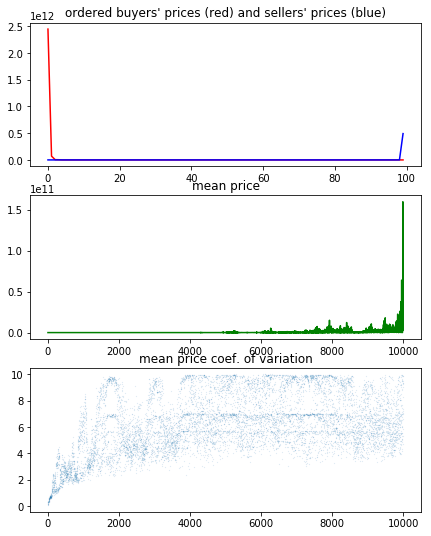

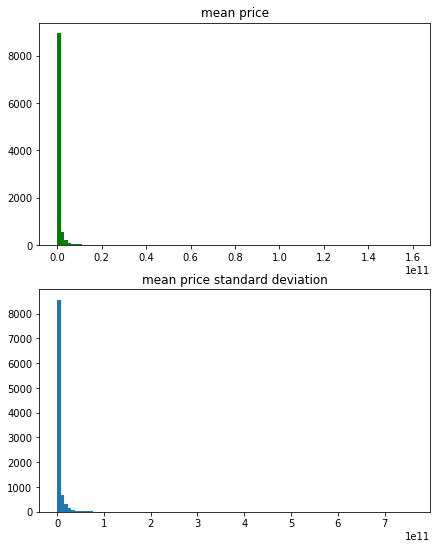

In [8]:
# unstructured case (remember the warming up step)
meanPrice_ts=[]
meanPriceStDev_ts=[]
meanPriceVar_ts=[]

for t in range(1,nCycles+1):    
    dealPrices=[]
    agNum=max(nBuyers,nSellers)
    for n in range(agNum):
        i = np.random.randint(0,nBuyers)
        j = np.random.randint(0,nSellers)
        #print ('%2d %2d %.3f %.3f %.3f'% \
        #      (i,j,buyerPriceList[i]-sellerPriceList[j],\
        #       buyerPriceList[i],sellerPriceList[j]))
        
        dealPrices.append((sellerPriceList[j]+buyerPriceList[i]/0.5))
        
        if np.random.uniform(0,1)>=0.5:    
            buyerPriceList[i] *=1/(1+np.random.uniform(0,d1))
            sellerPriceList[j]*=1+np.random.uniform(0,d2)
        else:
            buyerPriceList[i] *=1+np.random.uniform(0,d1)
            sellerPriceList[j]*=1/(1+np.random.uniform(0,d2))

        #print ('%2d %2d %.3f %.3f %.3f \n'% \
        #      (i,j,buyerPriceList[i]-sellerPriceList[j],\
        #       buyerPriceList[i],sellerPriceList[j]))
           
    if len(dealPrices) > 2:
        meanPrice_ts.append(s.mean(dealPrices))
        meanPriceVar_ts.append(s.variance(dealPrices))
        meanPriceStDev_ts.append(s.stdev(dealPrices))
    else:
        meanPrice_ts.append(np.nan)
        meanPriceStDev_ts.append(np.nan)

    if t % 1000==0:
        clear_output()
        #flush_figures()
        print('time', t, 'n. of exchanges', len(dealPrices))
        print(\
        'mean and var of exchange prices in the last cycle: %.3f, %.3f' %\
              (meanPrice_ts[-1],meanPriceVar_ts[-1]))

        plt.figure(1,figsize=(7,9),clear=True)
        plt.subplot(311)
        plt.title(\
            "ordered buyers' prices (red) and sellers' prices (blue)")
        plt.plot(np.sort(buyerPriceList)[::-1],"r")
        plt.plot(np.sort(sellerPriceList),"b")
        plt.subplot(312)
        plt.title("mean price")
        plt.plot(meanPrice_ts,"g")
        plt.subplot(313)
        plt.title("mean price coef. of variation")
        coefOfVariation=[]
        for m in range(len(meanPriceStDev_ts)):
            coefOfVariation.append(meanPriceStDev_ts[m]/
                                   meanPrice_ts[m])
        plt.plot(coefOfVariation,".",markersize=0.1)
        show()
        #time.sleep(0.1)

plt.figure(2,figsize=(7,9))
plt.subplot(211)
plt.title("mean price")
plt.hist(meanPrice_ts,100,color="g");
plt.subplot(212)
plt.title("mean price standard deviation")
plt.hist(meanPriceStDev_ts,100);